# 1. Bitcoin. Cryptocurrencies. So hot right now.
Since the launch of Bitcoin in 2008, hundreds of similar projects based on the blockchain technology have emerged. We call these cryptocurrencies (also coins or cryptos in the Internet slang). Some are extremely valuable nowadays, and others may have the potential to become extremely valuable in the future1. In fact, the 6th of December of 2017 Bitcoin has a market capitalization above $200 billion.
That said, let's get to business.

In [5]:
 #import pandas
import pandas as pd
#import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 

# 2. Full dataset, filtering, and reproducibility

In [8]:
#reading 2017 data into pandas
data17=pd.read_csv('coinmarketcap_06122017.csv')
# Selecting the 'id' and the 'market_cap_usd' columns
market_cap_raw = data17[['id','market_cap_usd']]
# Counting the number of values
print(market_cap_raw.count())

id                1326
market_cap_usd    1031
dtype: int64


# 3. Discard the cryptocurrencies without a market capitalization
Why do the count() for id and market_cap_usd differ above? It is because some cryptocurrencies listed in coinmarketcap.com have no known market capitalization, this is represented by NaN in the data, and NaNs are not counted by count(). These cryptocurrencies are of little interest to us in this analysis, so they are safe to remove

In [9]:
# Filtering out rows without a market capitalization
cap = market_cap_raw.query('market_cap_usd > 0')
#counting the number of  values
print(cap.count())

id                1031
market_cap_usd    1031
dtype: int64


# 4. How big is Bitcoin compared with the rest of the cryptocurrencies?
At the time of writing, Bitcoin is under serious competition from other projects, but it is still dominant in market capitalization. Let's plot the market capitalization for the top 10 coins as a barplot to better visualize this.

Text(0, 0.5, '% of total cap')

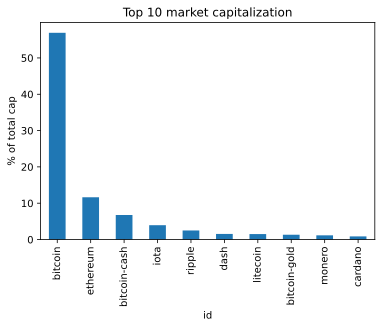

In [11]:
#Declaring these now for later use in the plots
TOP_CAP_TITLE = 'Top 10 market capitalization'
TOP_CAP_YLABEL = '% of total cap'
#selecting the top 10 crytocurrencies
cap10=cap.head(10).set_index('id')
#calculating market percentage
cap10 = cap10.assign(market_cap_perc = lambda x: (x.market_cap_usd/cap.market_cap_usd.sum())*100)
#plotting 
ax=cap10.market_cap_perc.head(10).plot.bar(title=TOP_CAP_TITLE)
ax.set_ylabel(TOP_CAP_YLABEL)

# Enhancing the plot.
While the plot above is informative enough, it can be improved. Bitcoin is too big, and the other coins are hard to distinguish because of this. Instead of the percentage, let's use a log10 scale of the "raw" capitalization. Plus, let's use color to group similar coins and make the plot more informative1.

For the colors rationale: bitcoin-cash and bitcoin-gold are forks of the bitcoin blockchain2. Ethereum and Cardano both offer Turing Complete smart contracts. Iota and Ripple are not minable. Dash, Litecoin, and Monero get their own color.

1)This coloring is a simplification. There are more differences and similarities that are not being represented here.

2) The bitcoin forks are actually very different, but it is out of scope to talk about them here. Please see the warning above and do your own research.

Text(0, 0.5, 'USD')

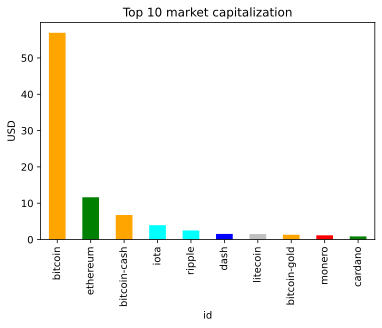

In [13]:
# Plotting market_cap_usd as before but adding the colors and scaling the y-axis  
ax = cap10.market_cap_perc.head(10).plot.bar(title=TOP_CAP_TITLE,color= ['orange', 'green', 'orange', 'cyan', 'cyan', 'blue', 'silver', 'orange', 'red', 'green'])
# Annotating the y axis with 'USD'
ax.set_ylabel('USD')

# 6. What is going on?! Volatility in cryptocurrencies
The cryptocurrencies market has been spectacularly volatile since the first exchange opened. This notebook didn't start with a big, bold warning for nothing. Let's explore this volatility a bit more! We will begin by selecting and plotting the 24 hours and 7 days percentage change, which we already have available.

In [16]:
#selecting id,percent_change_24h and percent_change_7d
volatility=data17[['id','percent_change_24h','percent_change_7d']]
# Setting the index to 'id' and dropping all NaN rows
volatility = volatility.set_index('id').dropna()

# Sorting the DataFrame by percent_change_24h in ascending order
volatility = volatility.sort_values(['percent_change_24h'], ascending=True)

# Checking the first few rows
volatility.head(10)

,percent_change_24h,percent_change_7d
id,,
flappycoin,-95.85,-96.61
credence-coin,-94.22,-95.31
coupecoin,-93.93,-61.24
tyrocoin,-79.02,-87.43
petrodollar,-76.55,542.96
bitok,-74.37,-71.67
bankcoin,-68.56,50.14
tellurion,-63.75,-52.59
shadow-token,-61.40,-59.05


# 7. Well, we can already see that things are a bit crazy
It seems you can lose a lot of money quickly on cryptocurrencies. Let's plot the top 10 biggest gainers and top 10 losers in market capitalization.

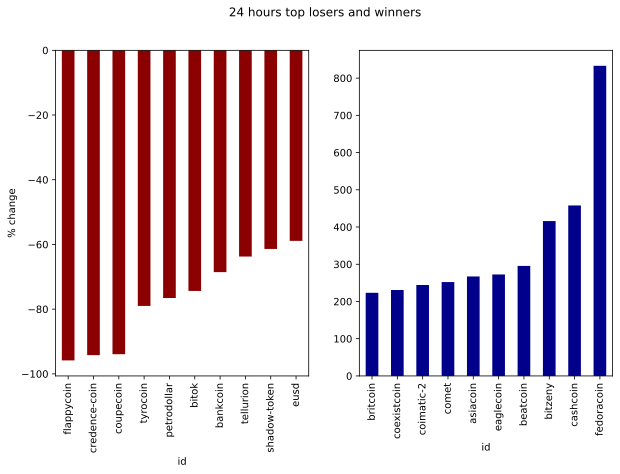

In [17]:
#Defining a function with 2 parameters, the series to plot and the title
def top10_subplot(volatility_series, title):
    # Making the subplot and the figure for two side by side plots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
    
    # Plotting with pandas the barchart for the top 10 losers
    ax = (volatility_series[:10].plot.bar(color='darkred', ax=axes[0]))
    
    # Setting the figure's main title to the text passed as parameter
    fig.suptitle(title)
    
    # Setting the ylabel to '% change'
    ax.set_ylabel("% change")
    
    # Same as above, but for the top 10 winners
    ax = (volatility_series[-10:].plot.bar(color='darkblue', ax=axes[1]))
    
    # Returning this for good practice, might use later
    return fig, ax
DTITLE = "24 hours top losers and winners"
# Calling the function above with the 24 hours period series and title DTITLE  
fig, ax = top10_subplot(volatility.percent_change_24h, DTITLE)

# 8. Let's check the weekly Series too.
800% daily increase?! Why are we doing this tutorial and not buying random coins?1

After calming down, let's reuse the function defined above to see what is going weekly instead of daily.

1 Please take a moment to understand the implications of the red plots on how much value some cryptocurrencies lose in such short periods of time

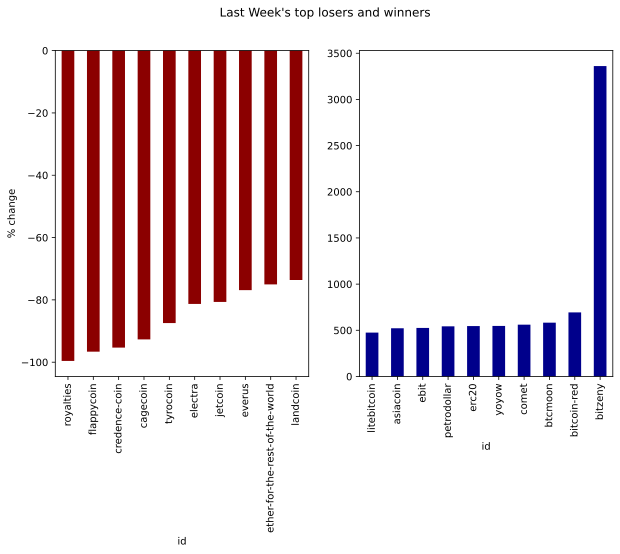

In [19]:
# Sorting in ascending order
volatility7d = volatility.sort_values(by='percent_change_7d', ascending=True)
DTITLE = "Last Week's top losers and winners"
# Calling the function above with the 7d period series and title DTITLE  
fig, ax = top10_subplot(volatility7d.percent_change_7d, DTITLE)

# 9. How small is small?
The names of the cryptocurrencies above are quite unknown, and there is a considerable fluctuation between the 1 and 7 days percentage changes. As with stocks, and many other financial products, the smaller the capitalization, the bigger the risk and reward. Smaller cryptocurrencies are less stable projects in general, and therefore even riskier investments than the bigger ones1. Let's classify our dataset based on Investopedia's capitalization definitions for company stocks.

1 Cryptocurrencies are a new asset class, so they are not directly comparable to stocks. Furthermore, there are no limits set in stone for what a "small" or "large" stock is. Finally, some investors argue that bitcoin is similar to gold, this would make them more comparable to a commodity instead.

In [20]:
# Selecting everything bigger than 10 billion 
largecaps = cap.query('market_cap_usd > 10000000000')

# Printing out largecaps
print(largecaps)

             id  market_cap_usd
0       bitcoin    2.130493e+11
1      ethereum    4.352945e+10
2  bitcoin-cash    2.529585e+10
3          iota    1.475225e+10


# 10. Most coins are tiny
Note that many coins are not comparable to large companies in market cap, so let's divert from the original Investopedia definition by merging categories.

<BarContainer object of 3 artists>

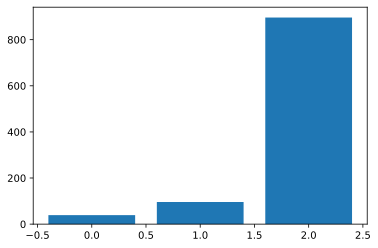

In [21]:
import numpy as np
# Making a nice function for counting different marketcaps from the
# "cap" DataFrame. Returns an int.
# INSTRUCTORS NOTE: Since you made it to the end, consider it a gift :D
def capcount(query_string):
    return cap.query(query_string).count().id

# Labels for the plot
lABELS = ["biggish", "micro", "nano"]

# Using capcount count the biggish cryptos
biggish = capcount('market_cap_usd > 300000000')

# Same as above for micro ...
micro = capcount('market_cap_usd > 50000000 and market_cap_usd < 300000000')

# ... and for nano
nano =  capcount('market_cap_usd < 50000000')

# Making a list with the 3 counts
values = [biggish, micro, nano]

# Plotting them with matplotlib 
ind = np.arange(len(values))
plt.bar(ind, values)
#plt.xticks(ind, LABELS)